In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class SingleLinearRegression():
    def __init__(self, k, b, m, low=0, high=10):
        self.x = np.random.rand(m) * (high-low) + low
        self.y = k*self.x + b
        self.m = m
        
    def plot(self, a=0.01, bs=1):
        t0, t1 = self.grad_decent(a, bs)
        yt = t1 * self.x + t0
        print('k:', t1, 'b:', t0)
        plt.subplot(121)
        plt.plot(self.x, self.y, 'o')
        plt.subplot(122)
        plt.plot(self.x, yt, '*', color='y')
        
    def cost(self, t0, t1):
        square = t0 + t1*self.x - self.y
        return 1 / (2*self.m) * np.matmul(square.T, square)
        
    def grad_decent(self, a, bs = 1):
        t0 = t1 = np.random.rand()
        J = self.cost(t0, t1)
        it = 0
        while not np.isclose(J, 0):
            it %= 1 / bs
            start, end = int(self.m*bs*it), min(self.m, int(self.m*bs*(it+1)))
            x, y = self.x[start:end+1], self.y[start:end+1]
            t0 -= a/self.m * sum(t1*x + t0 - y)
            t1 -= a/self.m * sum((t1*x + t0 - y) * x)
            J = self.cost(t0, t1)
            it += 1
        return t0, t1

k: 1.9999578772031417 b: -1.999723099768689


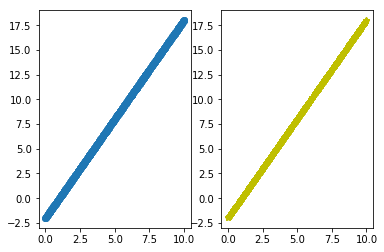

In [3]:
testcase = SingleLinearRegression(2, -2, 1000)
testcase.plot()